# Tâche 5

Etudier l’effet de 3 éléments de symétrie différents (pas l’identité) chacun pour 1 atome différent.

In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol.pymatgen import quick_view
from plotly.subplots import make_subplots
from pymatgen.io.cif import CifWriter
import plotly.graph_objects as go
from IPython.display import Image

In [2]:
mp_key = "xaEW7gxeGjtHSTeJuWSz9Uf8JpzNlgtg"
mp_id = "mp-9382"

In [3]:
with MPRester(mp_key) as m:
    structure = m.get_structure_by_material_id(mp_id)
struct = SpacegroupAnalyzer(structure)
conv_struc = SpacegroupAnalyzer(structure).get_conventional_standard_structure()
symmops = SpacegroupAnalyzer(conv_struc).get_space_group_operations()


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
sites = conv_struc.sites
    
Sr_atom = 1
Zr_atom = 4
N_atom = 8

# 1) Première opération de symétrie

Pour cette première opération de symétrie nous avons choisi un atome Sr. La matrice de rotation correspond à un opérateur d'inversion, soit une opération de deuxième espèce qui inverse la chiralité. Chaque coordonnée (x, y, z) est transformée en (-x, -y, -z). Le vecteur de translation tau est nul ce qui signifie qu'il n'y a pas de translation supplémentaire.






### Matrice de l'opération:
\begin{bmatrix}
-1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & -1
\end{bmatrix}





In [22]:
i_atom = Sr_atom
i_symmop = 2

symmop = symmops[i_symmop - 1]
print(symmop)

Rot:
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]


In [6]:
pos_init = conv_struc.sites[i_atom - 1].frac_coords
pos_final = symmop.operate(pos_init)


print(f"Atome {i_atom} :")
print(f"Position initiale : {pos_init}")
print(f"Position après symétrie : {pos_final}\n")


Atome 1 :
Position initiale : [0. 0. 0.]
Position après symétrie : [0. 0. 0.]



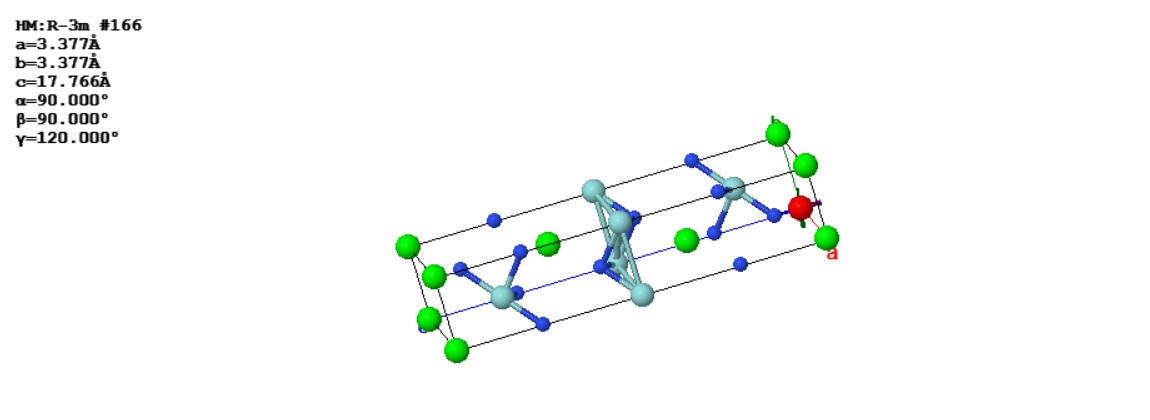

In [7]:
display(Image(filename="Op1.png"))

# 2) Deuxième opération de symétrie

Pour la deuxième opération de symétrie nous nous concentrons sur un atome Zr. La matrice de rotation semble correspondre à une rotation d'ordre 4 autour de l'axe z (90 degrés), suivie d'une réflexion par rapport au plan xy, plan perpendiculaire à l'axe z, ainsi qu'une réflexion au plan perpendiculaire à y. Chaque coordonnée (x,y,z) devient (y, x, -z). Le vecteur de translation tau est nul ce qui signifie qu'il n'y a pas de translation supplémentaire. On observe aussi que le détermiant vaut 1 ce qui signifie que la chiralité est conservée. Nous pouvons spécifier que la rotation conserve la chiralité alors que la réflexion l'inverse.

### Matrice de rotation ordre 4

\begin{bmatrix}
0 & 1 & 0 \\
-1 & 0 & 0 \\
0 & 0 & 1
\end{bmatrix}

### Matrice de l'opération :
\begin{bmatrix}
0 & 1 & 0 \\
1 & 0 & 0 \\
0 & 0 & -1
\end{bmatrix}




In [23]:
i_atom = Zr_atom
i_symmop = 7


symmop = symmops[i_symmop - 1]


print(f"Numéro de l'opération de symétrie : {i_symmop}")
print(f"Atome sélectionné : {i_atom}\n")

print("Détails de l'opération :")

print(symmop)


Numéro de l'opération de symétrie : 7
Atome sélectionné : 4

Détails de l'opération :
Rot:
[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]


In [24]:
pos_init = conv_struc.sites[i_atom - 1].frac_coords
pos_final = symmop.operate(pos_init)


print(f"Atome {i_atom} :")
print(f"Position initiale : {pos_init}")
print(f"Position après symétrie : {pos_final}\n")

Atome 4 :
Position initiale : [0.66666667 0.33333333 0.83333333]
Position après symétrie : [ 0.33333333  0.66666667 -0.83333333]



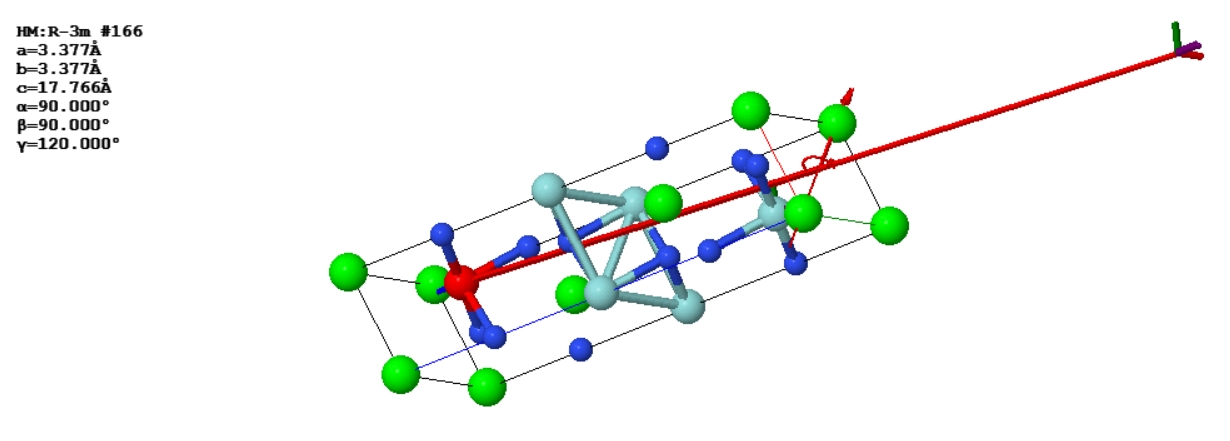

In [25]:
display(Image(filename="Op2.png"))

# 3) Troisième opération de symétrie


Pour la troisième opération de symétrie nous nous concentrons sur un atome N. Nous constatons que les coordonnées y et z restent inchangées tandis que la coordonnée x subit la transformation suivant x' = -x+y. Il s'agit d'une réflexion suivant un plan incliné, notons que le déterminant de la matrice vaut -1 indiquant une inversion de la chiralité.

### Matrice de l'opération 

\begin{bmatrix}
-1 & 1 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}

In [26]:
i_atom = N_atom
i_symmop = 10


symmop = symmops[i_symmop - 1]


print(f"Numéro de l'opération de symétrie : {i_symmop}")
print(f"Atome sélectionné : {i_atom}\n")

print("Détails de l'opération :")

print(symmop)

Numéro de l'opération de symétrie : 10
Atome sélectionné : 8

Détails de l'opération :
Rot:
[[-1.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.]


In [27]:
pos_init = conv_struc.sites[i_atom -1].frac_coords
pos_final = symmop.operate(pos_init)

print(f"Atome {i_atom} :")
print(f"Position initiale : {pos_init}")
print(f"Position après symétrie : {pos_final}\n")


Atome 8 :
Position initiale : [0.33333333 0.66666667 0.90007631]
Position après symétrie : [0.33333333 0.66666667 0.90007631]



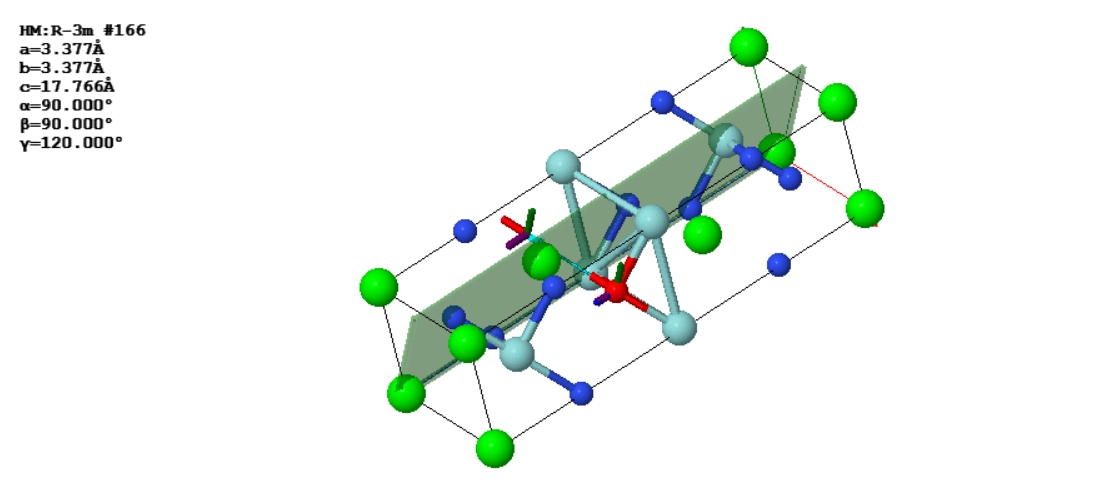

In [15]:
display(Image(filename="Op3.png"))